---
<strong>
    <h1 align='center'>Classification</h1>
</strong>

---

__k-nearest neighbors (KNN)__

In [1]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [3]:
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/23_Supervised Learning with scikit-learn/Course_A Supervised Learning/_dataset')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/CAREER-TRACK-Data-Scientist-with-Python/23_Supervised Learning with scikit-learn/Course_A Supervised Learning/_dataset


In [4]:
ls

automobile_miles_per_gallon.csv  gm_2008_region.csv
boston_housing.csv               house-votes-84.csv
diabetes.csv                     house-votes-84_missing_data.csv
gapminder_2008_region.csv        PIMA_Indians.csv
gapminder_all.csv                white-wine.csv
gapminder_drop_region.csv        winequality-red.csv


## __EDA__

### __approch 1__ [X]

In [5]:
dfc = pd.read_csv('house-votes-84.csv')
print(dfc.shape)
dfc.head(3)

(434, 17)


,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y


In [6]:
dfm = pd.read_csv('house-votes-84_missing_data.csv')

# Drop rows with a 'question mark' value in any column in a pandas dataframe
dfm = dfm[(dfm != '?').all(axis=1)].reset_index(drop=True)
# Reset index after dropping rows?
dfm.drop(['index'], axis=1, inplace=True)

print(dfm.shape)
dfm.head(3)

(232, 17)


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1


Shape of the dataframe get reduced.

In [7]:
dfm.columns

Index(['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'],
      dtype='object')

### __approch 2__ [✓]

In [8]:
df = pd.read_csv('house-votes-84.csv', header=None)
df.columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
              'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
              'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

df.replace({'?':'n'}, inplace=True)
df.replace({'n':0, 'y': 1}, inplace=True)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            435 non-null    int64 
 2   water              435 non-null    int64 
 3   budget             435 non-null    int64 
 4   physician          435 non-null    int64 
 5   salvador           435 non-null    int64 
 6   religious          435 non-null    int64 
 7   satellite          435 non-null    int64 
 8   aid                435 non-null    int64 
 9   missile            435 non-null    int64 
 10  immigration        435 non-null    int64 
 11  synfuels           435 non-null    int64 
 12  education          435 non-null    int64 
 13  superfund          435 non-null    int64 
 14  crime              435 non-null    int64 
 15  duty_free_exports  435 non-null    int64 
 16  eaa_rsa            435 non-null    int64 
dt

In [10]:
df.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.448276,0.581609,0.406897,0.487356,0.625287,0.549425,0.556322,0.475862,0.496552,0.344828,0.393103,0.480460,0.570115,0.400000,0.618391
std,0.495630,0.497890,0.493863,0.491821,0.500416,0.484606,0.498124,0.497390,0.499992,0.500564,0.475859,0.489002,0.500193,0.495630,0.490462,0.486341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


([<matplotlib.axis.XTick at 0x7ff16020b1c0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

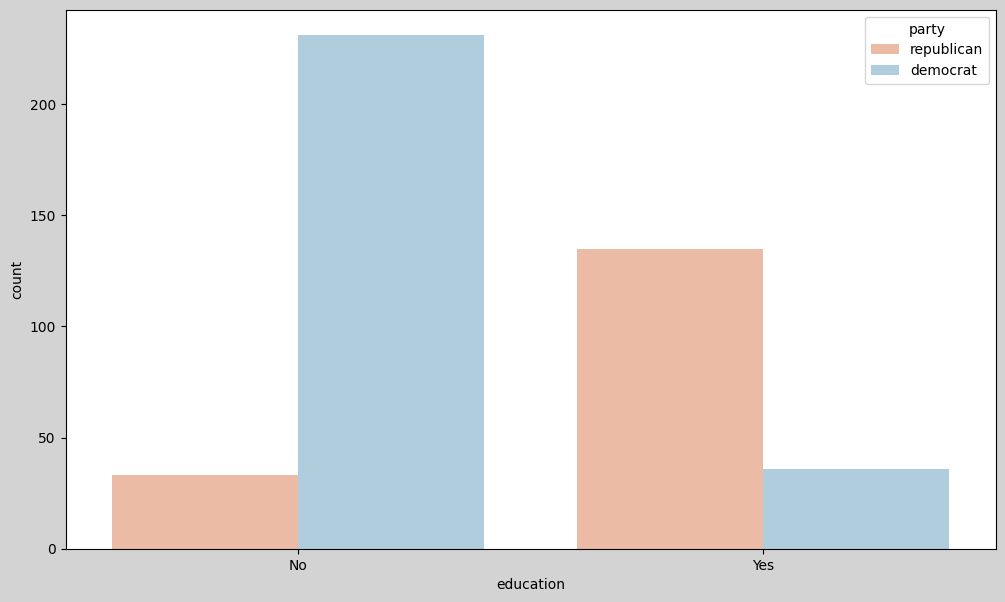

In [11]:
plt.figure(figsize=(12, 7), facecolor='lightgrey')
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0, 1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x7ff15de318a0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

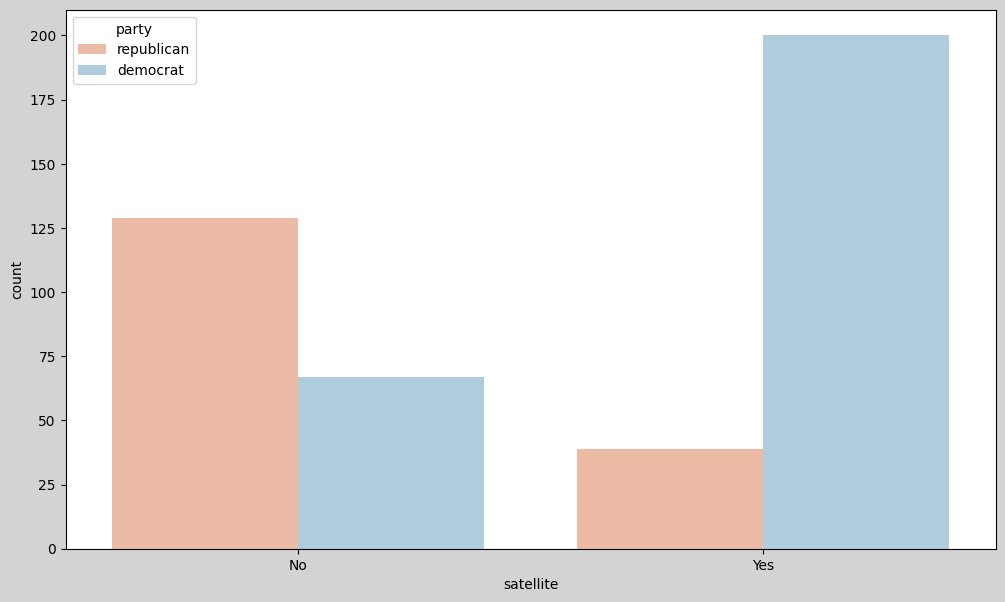

In [12]:
plt.figure(figsize=(12, 7), facecolor='lightgrey')
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0, 1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x7ff15e0dd990>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

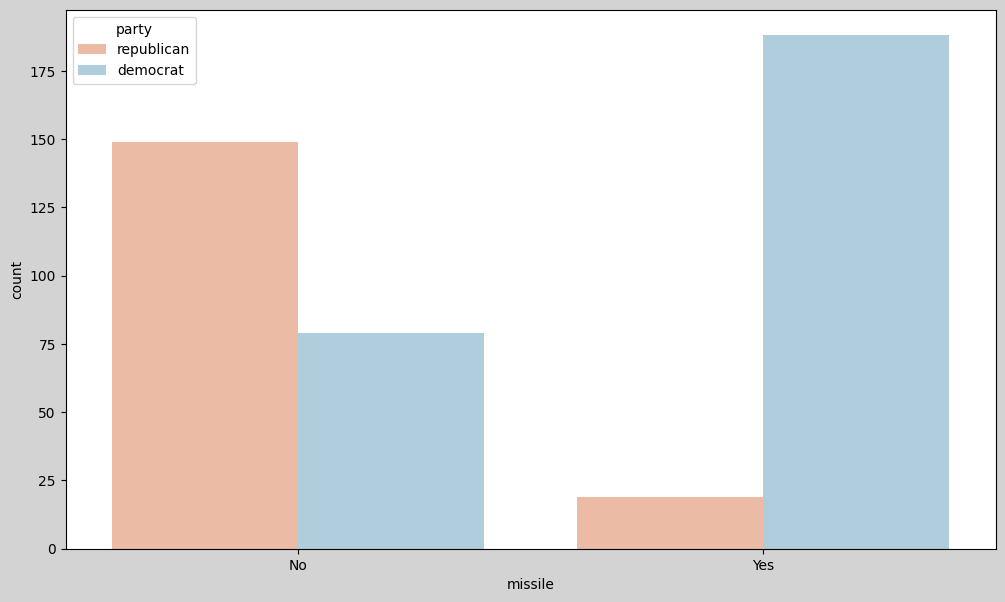

In [13]:
plt.figure(figsize=(12, 7), facecolor='lightgrey')
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0, 1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x7ff15e156590>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

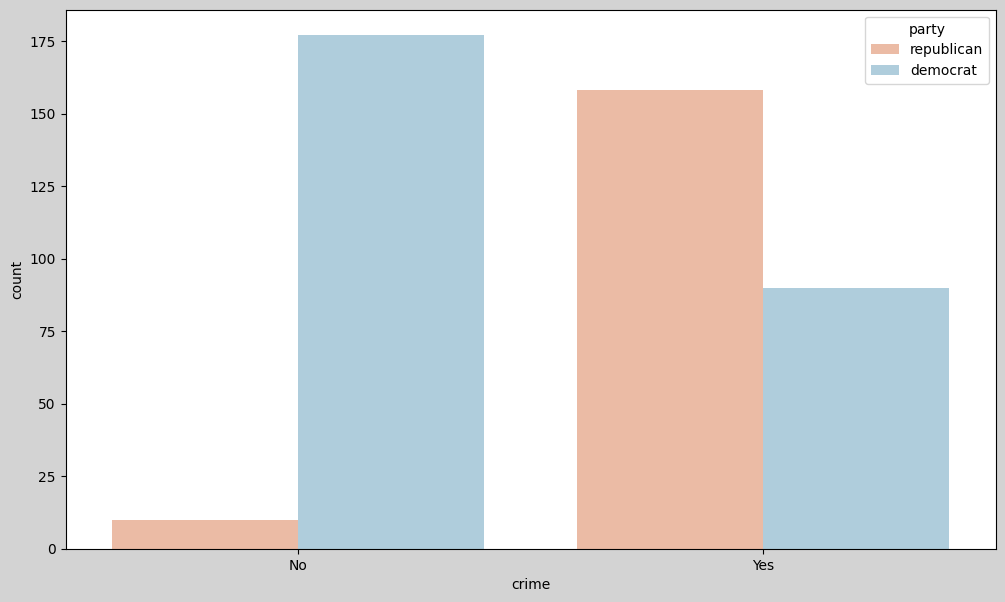

In [14]:
plt.figure(figsize=(12, 7), facecolor='lightgrey')
sns.countplot(x='crime', hue='party', data=df, palette='RdBu')
plt.xticks([0, 1], ['No', 'Yes'])

### __KNeighborsClassifier__

In [27]:
df.head(5)

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [34]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
X = df.drop('party', axis=1).values
print(X[:5])

y = df['party'].values
print(y[:5])

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

[[0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1]
 [0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0]
 [0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0]
 [0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1]
 [1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1]]
['republican' 'republican' 'democrat' 'democrat' 'democrat']


KNeighborsClassifier(n_neighbors=6)

In [36]:
# Predict the labels for the training data X
y_pred = knn.predict(X)

In [17]:
X_new = pd.DataFrame([0.696469, 0.286139, 0.226851, 0.551315, 0.719469, 0.423106, 0.980764,
                      0.68483, 0.480932, 0.392118, 0.343178, 0.72905, 0.438572, 0.059678,
                      0.398044, 0.737995]).transpose()

In [18]:
# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


In [21]:
print('shape of X: ',X.shape)
print('shape of y: ',y.shape)

shape of X:  (435, 16)
shape of y:  (435,)


# __The digits recognition dataset__

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

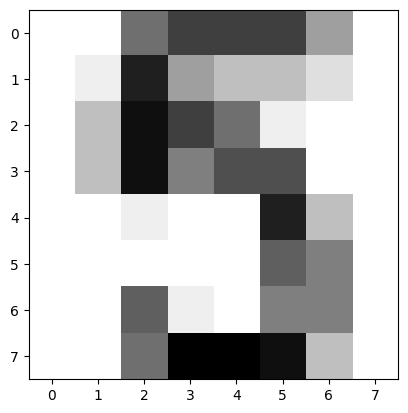

In [22]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### __Train/Test Split + Fit/Predict/Accuracy__

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


`stratify=y` **stratification** means that the `train_test_split` method returns **training** and **test subsets** that have the **same proportions** of class labels as the input dataset.

### __Overfitting and underfitting__

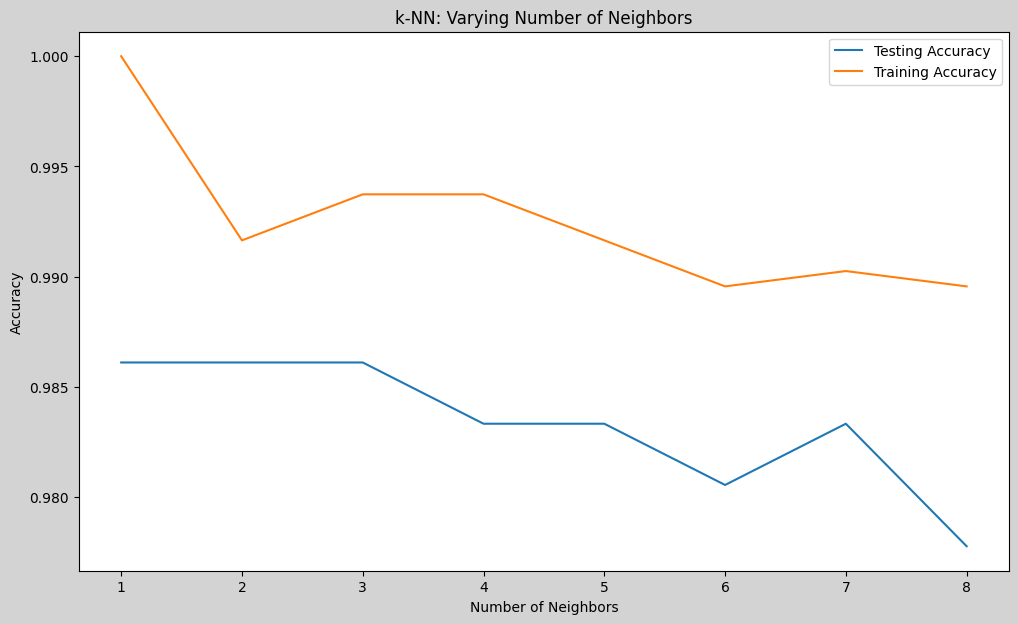

In [24]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.figure(figsize=(12, 7), facecolor='lightgrey')
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### $\color{skyblue}{\textbf{Connect with me:}}$


[<img align="left" src="https://cdn4.iconfinder.com/data/icons/social-media-icons-the-circle-set/48/twitter_circle-512.png" width="32px"/>][twitter]
[<img align="left" src="https://cdn-icons-png.flaticon.com/512/145/145807.png" width="32px"/>][linkedin]
[<img align="left" src="https://cdn2.iconfinder.com/data/icons/whcompare-blue-green-web-hosting-1/425/cdn-512.png" width="32px"/>][Portfolio]

[twitter]: https://twitter.com/F4izy
[linkedin]: https://www.linkedin.com/in/mohd-faizy/
[Portfolio]: https://mohdfaizy.com/
